In [3]:
import os
os.chdir(r"C:\Users\Acer\.jupyter\Linear Regression")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("Covid-19_prediction.csv",index_col=0,header=0)
data.head()

,Gender,Age,Oxygen level,Pulse rate,Covid 19 Chances
Sr no,,,,,
1,Male,20,78,70,10
2,Female,37,80,73,12
3,Male,50,50,50,65
4,Female,15,35,55,80
5,Male,70,40,55,90


In [9]:
print(data.dtypes)
print(data.shape)
print(data.describe())

Gender              object
Age                  int64
Oxygen level         int64
Pulse rate           int64
Covid 19 Chances     int64
dtype: object
(200, 5)
              Age  Oxygen level  Pulse rate  Covid 19 Chances
count  200.000000    200.000000  200.000000        200.000000
mean    35.875000     65.125000   62.375000         44.875000
std     18.522277     19.902006   10.111657         31.047206
min     15.000000     35.000000   50.000000          5.000000
25%     20.000000     47.500000   53.750000         11.500000
50%     30.000000     71.500000   62.500000         48.500000
75%     50.500000     78.500000   72.250000         68.750000
max     70.000000     95.000000   74.000000         90.000000


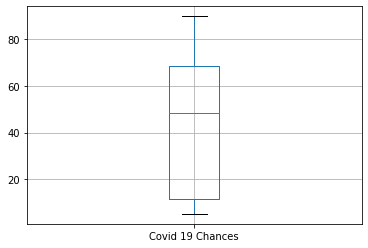

In [14]:
data.boxplot(column="Covid 19 Chances")

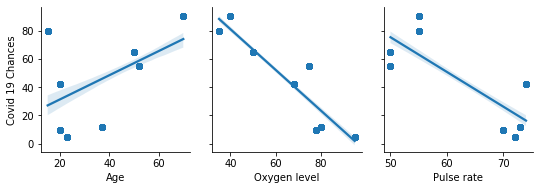

In [15]:
sns.pairplot(data,x_vars=["Age","Oxygen level","Pulse rate"],y_vars="Covid 19 Chances",kind = 'reg')

In [16]:
X = data[['Age','Oxygen level','Pulse rate']]
Y = data['Covid 19 Chances']


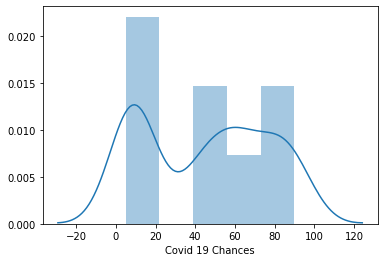

In [23]:
sns.distplot(Y,hist=True)

In [21]:
#Y_log_1 = np.log(Y_log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A180860488>,
      dtype=object)

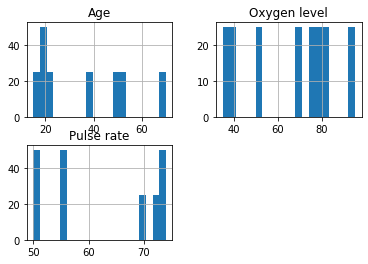

In [24]:
X.hist(bins=20)

In [25]:
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
print(data_num_skew)
print(data_num_skewed)

X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

Age             0.545414
Oxygen level   -0.217016
Pulse rate     -0.059329
dtype: float64
Series([], dtype: float64)


                   Age  Oxygen level  Pulse rate
Age           1.000000     -0.307015   -0.596729
Oxygen level -0.307015      1.000000    0.655242
Pulse rate   -0.596729      0.655242    1.000000


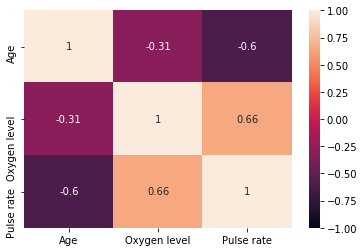

In [27]:
corr_df = X.corr(method = "pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["Features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,Features,VIF Factor
0,Age,3.29
1,Oxygen level,20.09
2,Pulse rate,22.76


In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [46]:
print(X_train)

       Age  Oxygen level  Pulse rate
Sr no                               
191     23            95          72
8       52            75          50
27      50            50          50
139     50            50          50
59      50            50          50
...    ...           ...         ...
114     37            80          73
65      20            78          70
16      52            75          50
126     20            68          74
10      37            80          73

[160 rows x 3 columns]


In [ ]:
#>1000---test size=0.3
#<1000----test size=0.2

In [34]:
from sklearn.linear_model import LinearRegression
#create model object
lm = LinearRegression()
#train model object
model = lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)



155.13071212465482
[ 0.2472822  -1.1506083  -0.71351878]


In [35]:
print(list(zip(X.columns,lm.coef_)))

[('Age', 0.24728219573369267), ('Oxygen level', -1.150608297849014), ('Pulse rate', -0.7135187780031034)]


In [38]:
X1=25
X2=40
X3=55
Y_pred = 155.13071212464482+(0.2472822*X1)+(-1.1506083*X2)+(-0.71351878*X3)
print(Y_pred)

76.0449022246448


In [43]:
import pickle as pk
pk.dump(model,open('model.pkl','wb'))
model = pk.load(open('model.pkl','rb'))

In [56]:
a = np.array([[50,78,70]])
model.predict(a)

array([27.80106022])

In [41]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual Chances"]=Y_test
new_df["Predicted Chances"]=Y_pred
new_df

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Age,Oxygen level,Pulse rate,Actual Chances,Predicted Chances
Sr no,,,,,
60,15,35,55,80,76.044902
6,20,68,74,42,76.044902
21,70,40,55,90,76.044902
199,23,95,72,5,76.044902
53,70,40,55,90,76.044902
20,15,35,55,80,76.044902
163,50,50,50,65,76.044902
56,52,75,50,55,76.044902
70,20,68,74,42,76.044902
